In [4]:
!pip install opencv-python
!pip install requests

  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached urllib3-1.26.8-py2.py3-none-any.whl (138 kB)
  Using cached idna-3.3-py3-none-any.whl (61 kB)
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)


In [5]:
import cv2
import numpy as np
import requests
from PIL import Image
import glob
import os

## Watermark Image with Logo

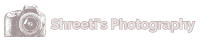

In [6]:
# Reading logo form url
logo = Image.open(requests.get('https://i.postimg.cc/2y8C4HFL/Logo-Makr-693uj6.png', stream=True).raw)
logo

In [49]:
images_path = glob.glob("./images/*.*")
print(images_path)

print('Starting the watermarking process!')
for img in images_path:
  image_to_watermark = cv2.imread(img)
  image_to_watermark = cv2.resize(image_to_watermark, (500,300), interpolation = cv2.INTER_AREA)
  h_image, w_image, image_channel = image_to_watermark.shape
  h_logo, w_logo, logo_channel = logo.shape

  # Get the center of the original image where watermark will be placed
  center_y = int(h_image / 2)
  center_x = int(w_image / 2)
  top_y = center_y - int(h_logo / 2)
  left_x = center_x - int(w_logo / 2)
  bottom_y = top_y + h_logo
  right_x = left_x + w_logo

  # Get Region Of Iinterest of the imagae 
  roi = image_to_watermark[top_y: bottom_y, left_x: right_x]
  # Add Logo to the Roi
  result = cv2.addWeighted(roi, 1, logo, 1, 0)
  # Replace the ROI on the image with logo
  image_to_watermark[top_y: bottom_y, left_x: right_x] = result
  #save watermarked images  
  filename = os.path.basename(img)
  cv2.imwrite("./watermarked_images/"+filename, image_to_watermark)

print("All images have been watermarked!")

['./images/candle-gd7df65d77_1920.jpg', './images/field-g89f1a7eb8_1920.jpg', './images/nature-gecada0986_1920.jpg', './images/storm-g8f324df53_1920.jpg']
Starting the watermarking process!
All images have been watermarked!


## Text as Watermark

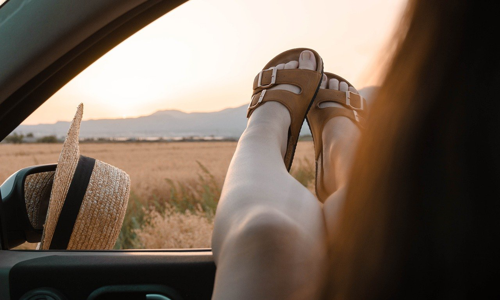

In [53]:
image = Image.open(requests.get('https://cdn.pixabay.com/photo/2019/07/18/17/36/nature-4346917_1280.jpg', stream=True).raw)

image_to_watermark = image.resize((500,300))
image_to_watermark

In [57]:
# Text Watermark
image_to_watermark = np.array(image_to_watermark.convert('RGB'))
cv2.putText(image_to_watermark, text="Shreeti's photography", org=(w_image - 200, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(214, 144, 139), thickness=2, lineType=cv2.LINE_4); 

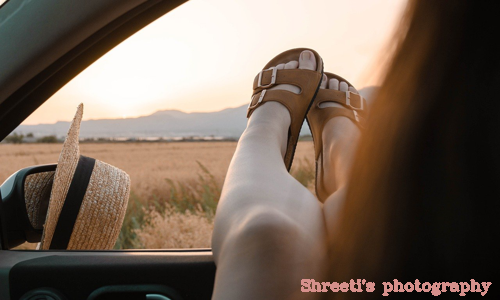

In [58]:
watermarked_image = Image.fromarray(image_to_watermark, 'RGB')
watermarked_image